TP  2 : Introduction à la bibliothèque spaCy et à l'analyse linguistique de texte
====

1 - Introduction 
------

L'objectif de ce TP est de se familiariser avec la bilbiothèque spaCy et de comprendre les différentes analyses linguistiques possibles au niveau du mot et notamment le couplage texte - ontologie. 

N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d\'utilisation accompagnent généralement l\'explication de chaque fonction.

- spaCy: https://spacy.io/api
- NLTK: https://www.nltk.org/
- WordCloud : https://amueller.github.io/word_cloud/
- Counter : https://docs.python.org/3/library/collections.html
- Python 3: https://docs.python.org/3/
- Matplotilb: https://matplotlib.org/contents.html

In [32]:
# A exécuter si ces librairies ne sont pas sur vos machines

#!pip install --user spacy
#!pip install --user nltk
#!pip install --user wordcloud
#!python3 -m spacy download en_core_web_lg
#!python3 -m spacy download fr_core_news_sm
#!pip install --upgrade --user Pillow


In [33]:
import spacy
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from wordcloud import WordCloud
from collections import Counter

2 - Génération de nuages de mots avec une motivation linguistique
-----

Importer le modèle de langue français.

In [34]:
# Pour impoter le moduèle : !python -m spacy download fr_core_news_sm
nlp = spacy.load("fr_core_news_sm")
# si vous voulez utiliser un autre modèle voici quelques liens intéressants
# Tous les modèles : https://spacy.io/models
# Anglais : https://spacy.io/models/en
# Italien : https://spacy.io/models/it

Lire l'un des deux textes proposés dans ce TP: sport.text ou sante.text.

In [35]:
text_path1 = "sport.txt"
text_path2 = "sante.txt"

text1 = ""
with open(text_path1, encoding='utf-8') as f:
    text1 = f.read()
    
text2 = ""
with open(text_path2, encoding='utf-8') as f:
    text2 = f.read()

Transformer le texte en un objet "nlp" de la bibliothèque spaCy qui vous permet d'accéder facilement aux objets textuels.

In [36]:
doc = nlp(text1)
doc2 = nlp(text2)


Fonction qui retourne la fréquence des 50 mots les plus fréquents dans un document.

In [37]:
freq_list = Counter(token.text for token in doc if "\n" not in token.text)
freq_list.most_common(50)

[(',', 51),
 ('.', 40),
 ('de', 35),
 ('les', 19),
 ('le', 19),
 ('en', 14),
 ('a', 13),
 ('du', 12),
 ('la', 12),
 ('"', 12),
 ('des', 11),
 ('Bleus', 9),
 ('dans', 9),
 ("l'", 9),
 ('se', 9),
 ('et', 9),
 ('pour', 8),
 ('sur', 8),
 ("d'", 7),
 (':', 6),
 ('une', 6),
 ('monde', 6),
 ('Lucas', 6),
 ('France', 5),
 ("L'", 5),
 ('Hernandez', 5),
 ('équipe', 5),
 ('est', 5),
 ('que', 5),
 ('par', 5),
 ('plus', 5),
 ('un', 5),
 ('qui', 5),
 ('-', 4),
 ('Australie', 4),
 ('cette', 4),
 ('Coupe', 4),
 ('mois', 4),
 ('La', 4),
 ('après', 4),
 ('but', 4),
 ('blessure', 4),
 ('Didier', 4),
 ('Deschamps', 4),
 ('pas', 4),
 ('match', 3),
 ('contre', 3),
 ('victoire', 3),
 ('(', 3),
 (')', 3)]

[Q1] Programmer la suite d'instructions pour calculer les 40 mots les plus fréquents du fichier sante.txt.

In [38]:
# Insérer votre code ici
freq = Counter(token.text for token in doc2 if "\n" not in token.text)
freq.most_common(40)

[('de', 52),
 (',', 50),
 ('les', 39),
 ('la', 35),
 ('.', 35),
 ('"', 22),
 ('et', 21),
 ('en', 20),
 ('le', 20),
 ('à', 19),
 ('grippe', 17),
 ('vaccination', 16),
 ("l'", 16),
 ('est', 16),
 ('personnes', 12),
 ('contre', 10),
 ('une', 10),
 ('a', 10),
 ('des', 9),
 ('?', 8),
 ('(', 8),
 (')', 8),
 ("d'", 7),
 ('faire', 7),
 ('moins', 7),
 ('Covid-19', 7),
 ('sur', 6),
 ('campagne', 6),
 ('que', 6),
 ('vacciner', 6),
 ('octobre', 6),
 ('par', 6),
 ('du', 6),
 ('vous', 6),
 ('-', 6),
 ('un', 6),
 ('pas', 6),
 ('plus', 5),
 ('fragiles', 5),
 ('deux', 5)]

Fonction qui génère un nuage de mots à partir d'une liste de mots ordonnés par leur fréquence.

In [40]:
def generate_wordcloud(freq_list):
    wordcloud = WordCloud(max_font_size=40).generate_from_frequencies(freq_list)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

Génerer le nuage de mots

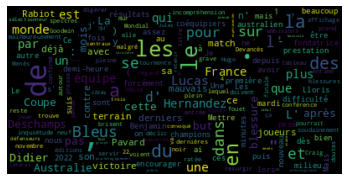

In [41]:
generate_wordcloud(freq_list)

[Q2] Générer le nuage de mots du fichier sante.txt.

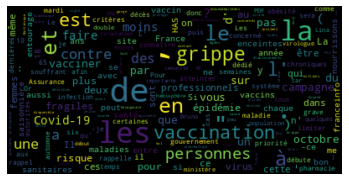

In [42]:
# Insérer votre code ici
generate_wordcloud(freq)

Fonction qui ne compte que les fréquences des mots qui ne sont pas de mots vides. Rappel, un mot vide est un mot qui n'a pas de sens dénotatif particulier. Ce sont les déterminants, les prépositions etc.

In [43]:
freq_list = Counter(token.text for token in doc if not token.is_stop and "\n" not in token.text)

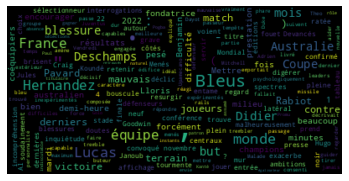

In [44]:
generate_wordcloud(freq_list)

[Q3] Générer le nuage de mots pour tous les mots sauf ceux qui sont un mot vide ou une ponctuation.

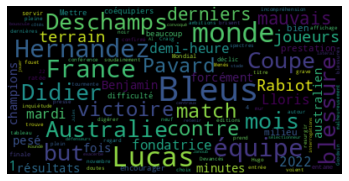

In [47]:
# insérer votre code ici
#ponct = ["'", ",", "!", ";", "?"]
#freq_list = Counter(token.text for token in doc if not token.is_stop and "\n" not in token.text and token.text not in ponct)
freq_list = Counter(token.text for token in doc if not token.is_stop and "\n" not in token.text and not token.is_punct)

generate_wordcloud(freq_list)

Fonction qui génère un nuage de lemmes, i.e. du radical d'un mot.

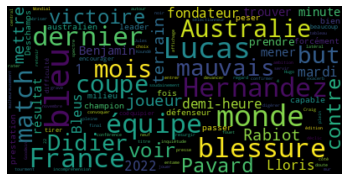

In [48]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and "\n" not in token.lemma_)
generate_wordcloud(freq_list)

Fonction qui génère un nuage de lemmes nominaux, i.e. seulement les noms.

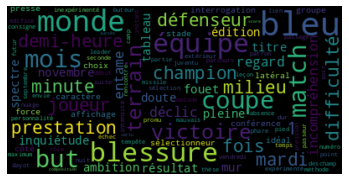

In [49]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.pos_ == "NOUN" and "\n" not in token.lemma_)
generate_wordcloud(freq_list)

[Q4] Générer le nuage de lemmes adjectivaux pour le texte sante.txt.

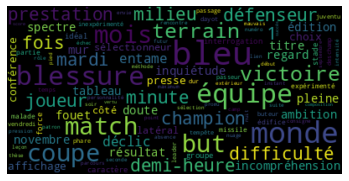

In [50]:
# Insérer votre code ici
freq_sant = Counter(token.lemma_ for token in doc2 if not token.is_stop and not token.is_punct and token.pos_ == "ADJ" and "\n" not in token.lemma_)
generate_wordcloud(freq_list)
            

Fonction qui génère un nuage d'entités nommées de type personne.

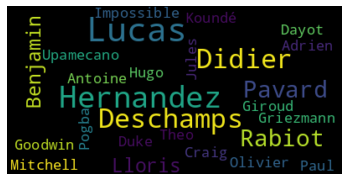

In [52]:
freq_list = Counter(token.text for token in doc if not token.is_stop and not token.is_punct and token.ent_type_ == "PER")
generate_wordcloud(freq_list)

[Q5] Générer le nuage d'entités nommées de type Localisation pour le texte sante.txt.

In [55]:
nlp.get_pipe("ner").labels

('LOC', 'MISC', 'ORG', 'PER')

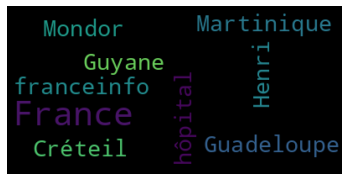

In [56]:
# insérer votre code ici
freq_list = Counter(token.text for token in doc2 if not token.is_stop and not token.is_punct and token.ent_type_ == "LOC")
generate_wordcloud(freq_list)

Fonction qui génère un nuage de mots qui sont compléments d'objet.

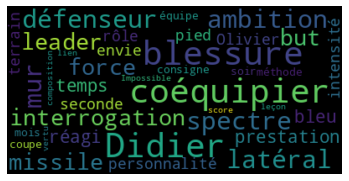

In [58]:
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.dep_ == "obj")
generate_wordcloud(freq_list)

[Q6] Générer le nuage des noms qui sont un sujet pour le texte sport.txt.

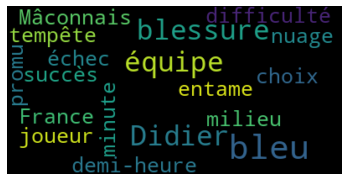

In [60]:
# insérer votre code ici
freq_list = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.dep_ == "nsubj" and "\n" not in token.lemma_)
generate_wordcloud(freq_list)

3 - Liste des informations linguistiques et leur visualisation
-----

Fonction qui montre toutes les informations linguistiques disponibles pour chacune des phrases d'un texte.

In [62]:
print('\n'.join(['\t'.join([str(token.i), token.text, token.lemma_, token.pos_, str(token.morph), 
                            str(token.head.i), token.dep_, token.ent_type_, token.ent_iob_]) for sent in doc.sents
                 for token in sent]))

0	France	France	PROPN	Gender=Fem|Number=Sing	0	ROOT		O
1	-	-	PROPN		1	ROOT		O
2	Australie	Australie	PROPN		2	ROOT		O
3	:	:	PUNCT		2	punct		O
4	une	un	DET	Definite=Ind|Gender=Fem|Number=Sing|PronType=Art	6	det		O
5	première	premier	ADJ	Gender=Fem|NumType=Ord|Number=Sing	6	amod		O
6	demi-heure	demi-heure	NOUN	Gender=Fem|Number=Sing	2	nmod		O
7	fondatrice	fondateur	ADJ	Number=Sing	6	amod		O
8	pour	pour	ADP		10	case		O
9	les	le	DET	Definite=Def|Number=Plur|PronType=Art	10	det		O
10	Bleus	bleu	NOUN	Gender=Masc|Number=Sing	6	nmod	ORG	B
11	dans	dans	ADP		13	case		O
12	cette	ce	DET	Gender=Fem|Number=Sing|PronType=Dem	13	det		O
13	Coupe	coupe	NOUN	Gender=Fem|Number=Sing	6	nmod	MISC	B
14	du	de	ADP	Definite=Def|Gender=Masc|Number=Sing|PronType=Art	15	case	MISC	I
15	monde	monde	NOUN	Gender=Masc|Number=Sing	13	nmod	MISC	I
16	2022	2022	NUM	NumType=Card	6	nmod	MISC	I
17	?	?	PUNCT		2	punct		O
18	

	

	SPACE		17	dep		O
19	L'	le	DET	Definite=Def|Number=Sing|PronType=Art	20	det		O
20	entame	entame	NOUN	G

Visualisation des entités nommées dans un texte.

In [64]:
from spacy import displacy
displacy.render(doc, style="ent")

Visualisation de l'abre de dépendance d'une phrase donnée.

In [68]:
displacy.render(list(doc.sents)[4], style="dep")

[Q7] Visualiser l'abre de dépendance de la dixième phrase dans un format compact.

In [69]:
# insérer votre code ici
displacy.render(list(doc.sents)[9], style="dep")

4 - Utilisation d'une image pour la réalisation d'un nuage de mots
-----

In [74]:
from PIL import Image
import numpy as np

Convertir l'image en une matrice de valeurs 0 ou 255, i.e. un masque.

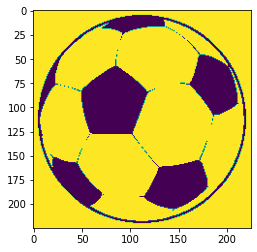

In [82]:
mask = (np.array(Image.open("football.png").convert('L')) > 0) * 255
plt.imshow(mask)

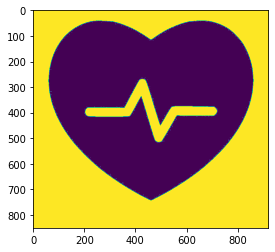

In [83]:
mask2 = (np.array(Image.open("heart.png").convert('L')) > 0) * 255
plt.imshow(mask2)

Génerer le nuage de mots avec des masques. 

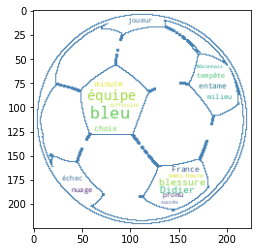

In [84]:
wc = WordCloud(background_color="white", max_words=100, mask=mask, contour_width=1, contour_color='steelblue')
wc.generate_from_frequencies(freq_list)
plt.imshow(wc, interpolation='bilinear')

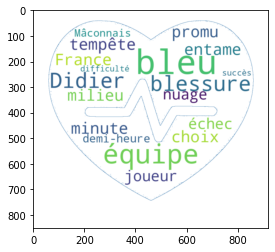

In [87]:
wc = WordCloud(background_color="white", max_words=100, mask=mask2, contour_width=1, contour_color='steelblue')
wc.generate_from_frequencies(freq_list)
plt.imshow(wc, interpolation='bilinear')

5 - Extraire des unités polylexicales
-----

In [88]:
import nltk
from nltk.collocations import *

Trouver les bigrams avec l'information mutuelle la plus forte.

In [91]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words([token.text for token in doc])
finder.nbest(bigram_measures.pmi, 10)

[('22', 'novembre'),
 ('Antoine', 'Griezmann'),
 ('Au', 'point'),
 ('Craig', 'Goodwin'),
 ('Dayot', 'Upamecano'),
 ('Golo', 'Kanté'),
 ('Jules', 'Koundé'),
 ('Mitchell', 'Duke'),
 ("N'", 'Golo'),
 ('Olivier', 'Giroud')]

[Q8] Trouver les 10 bigrams avec le coefficient de DICE le plus élevé.

In [92]:
# insérer votre code ici
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words([token.text for token in doc])
finder.nbest(bigram_measures.dice, 10)

[('22', 'novembre'),
 ('Antoine', 'Griezmann'),
 ('Au', 'point'),
 ('Craig', 'Goodwin'),
 ('Dayot', 'Upamecano'),
 ('Didier', 'Deschamps'),
 ('Golo', 'Kanté'),
 ('Jules', 'Koundé'),
 ('Mitchell', 'Duke'),
 ("N'", 'Golo')]

Trouver les 10 trigrams avec l'information mutuelle la plus élevée.

In [93]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words([token.text for token in doc])
finder.nbest(trigram_measures.pmi, 10)

[("N'", 'Golo', 'Kanté'),
 ('Promu', 'titulaire', 'indiscutable'),
 ('convoqué', 'trois', 'défenseurs'),
 ('déroulé', 'comme', 'rarement'),
 ('naturel', 'chez', 'moi'),
 ('ont', 'déroulé', 'comme'),
 ('paradoxalement', 'semblé', 'débloquer'),
 ('prendre', 'quelques', 'secondes'),
 ('sans', 'même', 'regarder'),
 ('tempête', 'emportait', 'tout')]

[Q9] Trouver les 10 trigrams avec le coefficient de DICE le plus élevé. Que se passe-t-il? Quelles sont les alternatives?

In [94]:
# insérer votre code ici
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words([token.text for token in doc])
finder.nbest(trigram_measures.raw_freq, 10)

# Il n'existe de coefficient DICE pour trigram
# Les alternatives sont : chi_sq, jaccard,likelihood_ratio, mi_like, poisson_stirling, raw_freq, student_t

[('Coupe', 'du', 'monde'),
 ('blessure', 'de', 'Lucas'),
 (',', 'les', 'Bleus'),
 ('de', 'Lucas', 'Hernandez'),
 ('sur', 'le', 'terrain'),
 ('équipe', 'de', 'France'),
 ('"', ',', 'a'),
 ('"', 'La', 'blessure'),
 ('-', '1', ')'),
 ('Didier', 'Deschamps', 'en')]

Intégrer les 30 meilleurs bigrams suivant le coefficient de DICE dans un texte en les connectant par un underscore. Et générer le nuage de mot correspondant. 

In [95]:
from nltk.tokenize import MWETokenizer

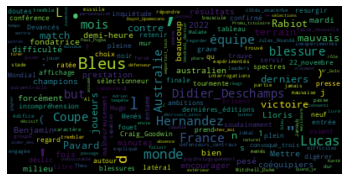

In [98]:
finder = BigramCollocationFinder.from_words([token.text for token in doc])
tokenizer = MWETokenizer(finder.nbest(bigram_measures.dice, 30))
new_doc = nlp(' '.join(tokenizer.tokenize([token.text for token in doc])))
generate_wordcloud(Counter([token.text for token in new_doc if not token.is_stop and "\n" not in token.text]))

[Q10] Intégrer les 30 meilleurs trigrams suivant l'information mutuelle dans un texte en les connectant par un underscore. Et générer un nuage de mot qui ne contient que des trigrams.

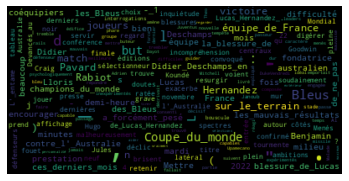

In [101]:
# insérer votre code ici
finder = TrigramCollocationFinder.from_words([token.text for token in doc])
tokenizer = MWETokenizer(finder.nbest(trigram_measures.raw_freq, 30))
new_doc = nlp(' '.join(tokenizer.tokenize([token.text for token in doc])))
generate_wordcloud(Counter([token.text for token in new_doc if not token.is_stop and "\n" not in token.text]))

6 - Enrichissement des textes par liaison ontologique
-----

In [103]:
from nltk.corpus import wordnet as wn
#import nltk
#nltk.download('omw-1.4')

L'algorithme de Lesk (https://en.wikipedia.org/wiki/Lesk_algorithm) permet de désambiguiser le sens d'un mot dans un contexte défini. Par exemple, dans la phrase, "le chanteur danse la java avec des choristes", l'algorithme de Lesk permet de désambiguiser le sens de java, i.e. java dans les sens de danse et non java dans le sens de café ou de langage de programmation. L'algorithme de Lesk retourne le sens correspondant à un mot dans un contexte donné.

In [107]:
def lesk(context_sentence, ambiguous_word, pos=None, synsets=None):
    
    """Return a synset for an ambiguous word in a context.
    :param iter context_sentence: The context sentence where the ambiguous word
         occurs, passed as an iterable of words.
    :param str ambiguous_word: The ambiguous word that requires WSD.
    :param str pos: A specified Part-of-Speech (POS).
    :param iter synsets: Possible synsets of the ambiguous word.
    :return: ``lesk_sense`` The Synset() object with the highest signature overlaps.
    This function is an implementation of the original Lesk algorithm (1986) [1].
    Usage example::
        >>> lesk(['I', 'went', 'to', 'the', 'bank', 'to', 'deposit', 'money', '.'], 'bank', 'n')
        Synset('savings_bank.n.02')
    [1] Lesk, Michael. "Automatic sense disambiguation using machine
    readable dictionaries: how to tell a pine cone from an ice cream
    cone." Proceedings of the 5th Annual International Conference on
    Systems Documentation. ACM, 1986.
    https://dl.acm.org/citation.cfm?id=318728
    """

    context = set(context_sentence)
    
    if synsets is None:
        # synsets = wn.synsets(ambiguous_word, lang='fra')
        synsets = wn.synsets(ambiguous_word)
    
    if pos:
        synsets = [ss for ss in synsets if str(ss.pos()) == pos]

    if not synsets:
        return None
    
    _, sense = max(
        (len(context.intersection(ss.definition().split())), ss) for ss in synsets
    )

    return sense

Nous travaillerons avec un texte en anglais pour avoir toutes les fonctions nécessaires d'accès à wordnet. Si vous voulez tester d'autres langues, l'italien et l'espagnol fonctionnent.

In [206]:
nlp = spacy.load("en_core_web_lg")

text_path3 = "sport-en.txt"

text3 = ""
with open(text_path3, encoding='utf-8') as f:
    text3 = f.read()
    
doc = nlp(text3)

Pour tous les mots d'un texte, trouver le sens de chacun d'eux dans wordnet. Attention, seuls les noms, les verbes, les adjectifs et les adverbes se trouvent dans wordnet. Dans cet exemple, le contexte donné est celui de la phrase dans lequel se trouve le mot.

In [207]:
pos_to_wn = {'NOUN': wn.NOUN, 'VERB': wn.VERB, 'ADJ': wn.ADJ, 'ADV': wn.ADV, 'PROPN': wn.NOUN}

sent_level = []

for sent in doc.sents:
    context = [token.text for token in sent]
    for token in sent:
        if token.pos_ in pos_to_wn:
            # print((token.text, lesk(context, token.lemma_, pos=pos_to_wn[token.pos_])))
            sent_level.append((token.text, lesk(context, token.lemma_, pos=pos_to_wn[token.pos_])))
        else:
            sent_level.append((token.text, None))

sent_level

[('The', None),
 ('US', Synset('uranium.n.01')),
 ('Men', Synset('serviceman.n.01')),
 ('’s', None),
 ('National', Synset('national.n.01')),
 ('Team', Synset('team.n.02')),
 ('(', None),
 ('USMNT', None),
 (')', None),
 ('was', None),
 ('made', Synset('make.v.42')),
 ('to', None),
 ('work', Synset('work.v.01')),
 ('hard', Synset('hard.r.10')),
 ('for', None),
 ('its', None),
 ('place', Synset('seat.n.01')),
 ('in', None),
 ('the', None),
 ('World', Synset('world.n.06')),
 ('Cup', Synset('cup.n.08')),
 ('knockout', Synset('knockout.n.02')),
 ('stage', Synset('stage.n.08')),
 (',', None),
 ('earning', Synset('gain.v.08')),
 ('a', None),
 ('tough', Synset('tough.a.07')),
 ('1', None),
 ('-', None),
 ('0', None),
 ('win', Synset('win.n.01')),
 ('over', None),
 ('Iran', Synset('iran.n.01')),
 ('in', None),
 ('a', None),
 ('nerve', Synset('nerve.n.01')),
 ('-', None),
 ('racking', Synset('rack.v.10')),
 ('Group', Synset('group.n.03')),
 ('B', Synset('boron.n.01')),
 ('decider', None),
 ('at'

[Q11] Pour tous les mots d'un texte, trouver le sens de chacun d'eux dans wordnet en utilisant l'ensemble du document pour désambiguiser le sens? Quels sont vos commentaires par rapport à une désambiguisation basée sur la phrase uniquement.

In [208]:
# insérer votre code ici
context = [token.text for token in doc if not token.is_punct]
sens = []
for token in doc:
    res = lesk(context, token.lemma_, pos=pos_to_wn.get(token.pos_, 'NOUN'))
    sens.append((token.text, res))
sens

#La désambiguïsation basée sur la phrase uniquement peut être insuffisante pour résoudre les ambiguïtés de sens,
#car elle ne prend pas en compte les informations contextuelles plus larges telles que la connaissance du monde et les relations sémantiques entre les mots  

[('The', None),
 ('US', Synset('uracil.n.01')),
 ('Men', Synset('man.n.08')),
 ('’s', None),
 ('National', Synset('national.n.01')),
 ('Team', Synset('team.n.02')),
 ('(', None),
 ('USMNT', None),
 (')', None),
 ('was', None),
 ('made', Synset('make.v.42')),
 ('to', None),
 ('work', Synset('work.v.09')),
 ('hard', Synset('hard.r.10')),
 ('for', None),
 ('its', None),
 ('place', Synset('topographic_point.n.01')),
 ('in', None),
 ('the', None),
 ('World', Synset('worldly_concern.n.01')),
 ('Cup', Synset('cup.n.08')),
 ('knockout', Synset('smasher.n.02')),
 ('stage', Synset('stage.n.03')),
 (',', None),
 ('earning', Synset('gain.v.08')),
 ('a', None),
 ('tough', Synset('tough.a.01')),
 ('1', None),
 ('-', None),
 ('0', None),
 ('win', Synset('win.n.01')),
 ('over', None),
 ('Iran', Synset('iran.n.01')),
 ('in', None),
 ('a', None),
 ('nerve', Synset('nerve.n.01')),
 ('-', None),
 ('racking', Synset('rack.v.10')),
 ('Group', Synset('group.n.03')),
 ('B', Synset('barn.n.02')),
 ('decider', 

7 - PROJET : Réécrire un texte avec des informations retirées de wordnet 
-----

[PROJET Q1] Réécrire un texte en interchangeant un mot par son antonyme. Par exemple, "petit" devient "grand" et "laideur" devient "beauté". Vous pourrez utiliser la fonction highligth_word() pour mettre en avant les mots qui ont été changés.

In [209]:
def highlight_word(word):
    return "\x1b[43m" + word + "\x1b[m"

In [231]:
"""
def get_antonym(word):
    synsets = wn.synsets(word)
    if synsets:
        antonyms = [lemma.antonyms() for synset in synsets for lemma in synset.lemmas()]
        if antonyms and antonyms[0]:
            return antonyms[0][0].name()
    return None

for token in doc:
    antonyme = get_antonym(token.text)
    if antonyme:
        print(f"{token.text}: {antonyme}")
    else:
        print(token.text)
"""        
"""        
for word in doc:
    words = wn.synsets(word.text)
    syn = wn.synset(words[0].text)
    res = syn.lemmas()[0].antonyms()
    print(f"{words[0].text}  {res}")
"""

for word in doc:
    synsets = wn.synsets(word.text)
    if synsets:
        syn = synsets[0]  # Utilisez le premier synset de la liste
        antonyms = syn.lemmas()[0].antonyms() if syn.lemmas() else []
        antonyme = antonyms[0].name() if antonyms else None
        print(f"{word.text}  {antonyme}")
    else:
        print(f"{word.text}")


The
US  None
Men  None
’s
National  None
Team  None
(
USMNT
)
was  None
made  None
to
work  None
hard  easy
for
its  None
place  None
in  None
the
World  None
Cup  None
knockout  None
stage  None
,
earning  None
a  None
tough  None
1  None
-
0  None
win  None
over  None
Iran  None
in  None
a  None
nerve  None
-
racking  None
Group  None
B  None
decider
at  None
Qatar  None
2022
.



Christian  None
Pulisic
’s
first  None
-
half  None
goal  None
was  None
all  some
that
separated  None
the
two  None
sides  None
as  None
the
USMNT
reached  None
the
round  None
of
16  None
for
the
first  None
time  None
since
2014
.



The
pressure  None
was  None
certainly  None
on  off
for
Gregg
Berhalter
’s
side  None
in  None
Qatar  None
after  None
the
national  None
team  None
’s
failure  None
to
qualify  None
for
the
2018
World  None
Cup  None
,
but  None
the
US  None
got  None
the
job  None
done  None
with
three  None
gritty  None
group  None
performances  None
.



It  None
certainly  None
was  N

[PROJET Q2] Réécrire un texte en interchangeant tous les mots par leur hyponyme le plus profond dans wordnet pour un contexte donné. Ainsi, pour chaque mot vous devrez (1) trouver son synset, (2) descendre dans l'arbre en choisissant le prochain synset selon la relation d'hyperonimie, (3) parmi les hyponymes possibles choisir celui qui est le plus probable selon l'algorithme de Lesk. Par exemple, "groupe" devient "sous-groupe", "chat" devient "siamois".

In [43]:
# insérez votre code ici


The
uracil US
man Men
’s
chauvinist National
relay Team
(
USMNT
)
was
go_through_the_motions made
to
work work
hard hard
for
its
showplace place
in
the
worldly_concern World
Davis_Cup Cup
smasher knockout
proscenium stage
,
take_home earning
a
tough tough
1
-
0
first-place_finish win
over
Iran Iran
in
a
radial_nerve nerve
-
rack racking
subgroup Group
barn B
decider
at
Qatar Qatar
2022
.



Melkite Christian
Pulisic
’s
first first
-
second_half half
basket goal
was
all
that
twig separated
the
two
English sides
as
the
USMNT
reach reached
the
round round
of
16
for
the
first first
transmission_time time
since
2014
.



The
pressure pressure
was
surely certainly
on on
for
Gregg
Berhalter
’s
English side
in
Qatar Qatar
after
the
national national
relay team
’s
underdog failure
to
provide qualify
for
the
2018
worldly_concern World
Davis_Cup Cup
,
but
the
uracil US
get got
the
ball-buster job
admit done
with
three
gritty
subgroup group
specific_performance performances
.



It
surely certainl

[PROJET Q3] Réécrire un texte écrit en anglais en interchangeant tous les mots par leurs correspondants en français, en italien ou en espagnol. Cela revient à avoir un traducteur mot à mot. Par exemple, "group" devient "groupe", "cat" devient "chat".

In [45]:
# insérez votre code ici


The
uracile US
homme Men
’s
sujet National
attelage Team
(
USMNT
)
was
faire made
to
fonctionner work
dur hard
for
its
endroit place
in
the
monde World
coupe Cup
beauté knockout
estrade stage
,
comprendre earning
a
difficile tough
1
-
0
gagnant win
over
Abadan Iran
in
a
nerf nerve
-
racking
ensemble Group
b B
decider
at
Katar Qatar
2022
.



Christian Christian
Pulisic
’s
premier first
-
mi-temps half
but goal
was
all
that
bifurcation separated
the
two
anglais sides
as
the
USMNT
atteindre reached
the
rond round
of
16
for
the
premier first
durée time
since
2014
.



The
oppression pressure
was
absolument certainly
autour on
for
Gregg
Berhalter
’s
anglais side
in
Katar Qatar
after
the
national national
attelage team
’s
manque failure
to
condition qualify
for
the
2018
monde World
coupe Cup
,
but
the
uracile US
avoir got
the
travail job
faire done
with
three
gritty
ensemble group
exécution performances
.



It
absolument certainly
was
n’t
pretty
at
durée times
,
in
particular
in
the
closin

[PROJET Q4] Réécrire un texte en interchangeant tous les mots par leurs définitions. Cela revient à produire la contrainte Littérature Définitionnelle (https://www.oulipo.net/fr/contraintes/litterature-definitionnelle) du groupe de recherche en écriture créative OULIPO (https://fr.wikipedia.org/wiki/Oulipo).

In [46]:
# insérez votre code ici


The
a base containing nitrogen that is found in RNA (but not in DNA) and derived from pyrimidine; pairs with adenine US
a male person who plays a significant role (husband or lover or boyfriend) in the life of a particular woman Men
’s
a person who owes allegiance to that nation National
two or more draft animals that work together to pull something Team
(
USMNT
)
was
represent fictitiously, as in a play, or pretend to be or act like made
to
proceed towards a goal or along a path or through an activity work
to the full extent possible; all the way hard
for
its
a point located with respect to surface features of some region place
in
the
the concerns of this life as distinguished from heaven and the afterlife World
a large metal vessel with two handles that is awarded as a trophy to the winner of a competition Cup
a very attractive or seductive looking woman knockout
a large platform on which people can stand and can be seen by an audience stage
,
earn on some commercial or business tran

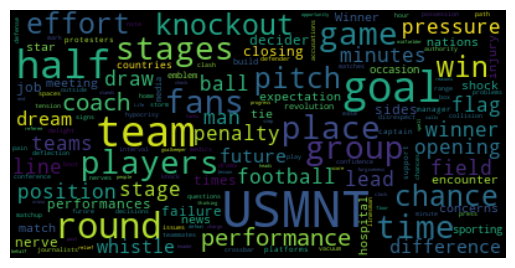

In [47]:
# insérez votre code ici

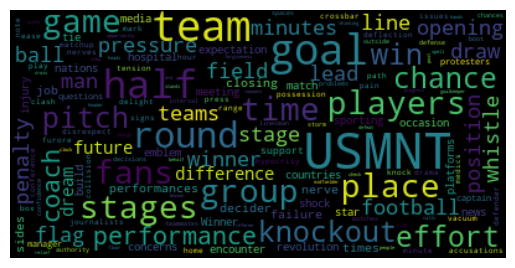

In [48]:
# insérez votre code ici